# Week 11 Discussion post


In [9]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

82% CI for median Total Compensation: 133405.0 140528.0


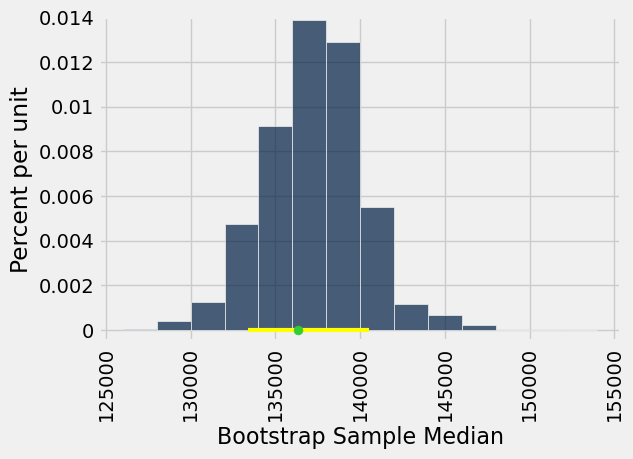

In [10]:
sf2019 = Table.read_table('san_francisco_2019.csv')
sf2019 = sf2019.where('Salary', are.above(15982))

sample_500 = sf2019.sample(500, with_replacement=False)

pop_median = percentile(50, sf2019.column('Total Compensation'))

def one_bootstrap_median():
    rs = sample_500.sample()  # default is with replacement = True
    return percentile(50, rs.column('Total Compensation'))

num_repetitions = 5000
bstrap_medians = make_array()
for _ in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

conf_level = 82
left_pct = (100 - conf_level) / 2    # 9
right_pct = left_pct + conf_level    # 91

left_val  = percentile(left_pct,  bstrap_medians)
right_val = percentile(right_pct, bstrap_medians)
print('82% CI for median Total Compensation:', left_val, right_val)

# Plot
# choose reasonable bins around your bootstrap range
lo = np.floor(np.min(bstrap_medians) / 2000) * 2000
hi = np.ceil(np.max(bstrap_medians) / 2000) * 2000
median_bins = np.arange(lo, hi + 2000, 2000)

resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
resampled_medians.hist(bins=median_bins)

plt.ylim(-0.000005, 0.00014)
plt.plot([left_val, right_val], [0, 0], color='yellow', lw=3, zorder=1)
plt.scatter(pop_median, 0, color='#32CD32', s=40, zorder=2)